<a href="https://colab.research.google.com/github/Rugiyya1/Youtube_comments_ham_scam_classificiation_with_Naive_Bayess/blob/main/Youtube_comments_Ham_Spam_classifier_with_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import glob
import matplotlib as plt
import seaborn as sns
import sklearn

In [ ]:
# Reading the datasets
ds1 =pd.read_csv('/content/Youtube01.csv')
ds2 =pd.read_csv('/content/Youtube02.csv')
ds3 =pd.read_csv('/content/Youtube03.csv')
ds4 =pd.read_csv('/content/Youtube04.csv')
ds5 =pd.read_csv('/content/Youtube05.csv')


In [ ]:
data = pd.concat([ds1,ds2,ds3,ds4,ds5], axis=0, ignore_index=True )

In [ ]:
## we only need content and class of youtube comments to classify spam and ham
data = data.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1)

In [ ]:
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,I love this song because we sing it at Camp al...,0
1951,I love this song for two reasons: 1.it is abou...,0
1952,wow,0
1953,Shakira u are so wiredo,0


In [ ]:
#checking missing values
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [ ]:
#checking spam and ham counts
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

In [ ]:
#data is not imbalanced

In [ ]:
## Train and test set
from sklearn.model_selection import train_test_split

In [ ]:
#define inputs and targets

inputs = data['CONTENT']
target = data['CLASS']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size=0.2,
                                                    random_state=365,
                                                    stratify =target)

In [ ]:
y_train.value_counts(normalize=True) # checking startify data # normalize=True gives fraction

1    0.513427
0    0.486573
Name: CLASS, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

1    0.514066
0    0.485934
Name: CLASS, dtype: float64

In [ ]:
#Preprocessing

#Tokenize youtube comments Using CountVectorizer() class

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [ ]:
x_train_transf

<1564x3925 sparse matrix of type '<class 'numpy.int64'>'
	with 20523 stored elements in Compressed Sparse Row format>

In [ ]:
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train_transf.shape

(1564, 3925)

### MutlinominalNB()

In [ ]:
#Using Multinomial Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

In [ ]:
model1 = MultinomialNB()

In [ ]:
model1.fit(x_train_transf, y_train)

MultinomialNB()

In [ ]:
#Smoothing paramater is introduced to avoit 0 probability of any word given in test, but not train dataset
#alpha set to 1 by sklearn

In [ ]:
model1.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [ ]:
# class_prior is to set specific values for prior probabilities
# fit_prior is boolean param, asks to learn prior probability

In [ ]:
#confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [ ]:
y_test_pred=model1.predict(x_test_transf)

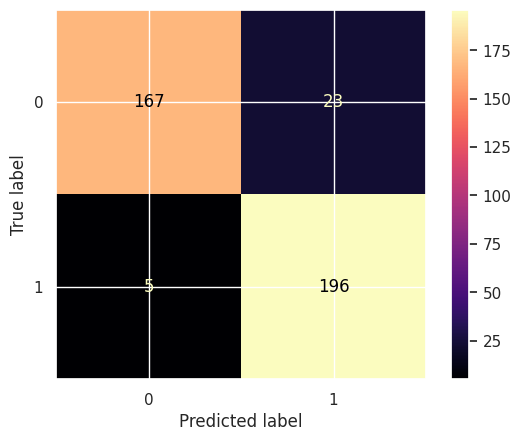

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = model1.classes_,
    cmap ='magma'
)

In [ ]:
print(classification_report(y_test, y_test_pred, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.88      0.92       190
        Spam       0.89      0.98      0.93       201

    accuracy                           0.93       391
   macro avg       0.93      0.93      0.93       391
weighted avg       0.93      0.93      0.93       391



#### Creating probability-distribution figures

In [ ]:
#NB calssifiers assume P(spam) = P(ham), so class_prior is set to none
# lets get current class_priors
np.exp(model1.class_log_prior_)

array([0.48657289, 0.51342711])

In [ ]:
## lets assume P(ham)>P(spam)

model2 = MultinomialNB(class_prior = np.array([0.6,0.4])) # this will raise prior of ham class to 60%, and lower spam to 40%

In [ ]:
model2.fit(x_train_transf, y_train)

MultinomialNB(class_prior=array([0.6, 0.4]))

In [ ]:
y_test_pred=model2.predict(x_test_transf)

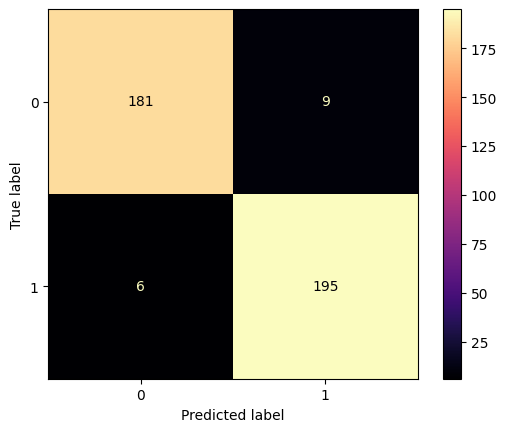

In [ ]:
# Drop the seaborn style, so that we remove the white lines passing throguh the numbers
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = model2.classes_,
    cmap ='magma'
)

In [ ]:
print(classification_report(y_test, y_test_pred, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.95      0.96       190
        Spam       0.96      0.97      0.96       201

    accuracy                           0.96       391
   macro avg       0.96      0.96      0.96       391
weighted avg       0.96      0.96      0.96       391



### ComplementNB

In [ ]:
#Using complement Naive Bayes Classifier

from sklearn.naive_bayes import ComplementNB

In [ ]:
from numbers import Complex
model3=ComplementNB()
model3.fit(x_train_transf, y_train)

ComplementNB()

In [ ]:
model3.get_params()

{'alpha': 1.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': 'warn',
 'norm': False}

In [ ]:
y_test_pred=model3.predict(x_test_transf)

In [ ]:
print(classification_report(y_test, y_test_pred, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.92      0.95       190
        Spam       0.93      0.98      0.95       201

    accuracy                           0.95       391
   macro avg       0.95      0.95      0.95       391
weighted avg       0.95      0.95      0.95       391



### Making predictions

In [ ]:
predict_data = vectorizer.transform(['This song is amazing!',
                                     ' You can win 1m dollars right now, just click here!!!'])

In [ ]:
model2.predict(predict_data)

array([0, 1])